In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('housing.csv')

# Display the first few rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
print(df.describe)

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

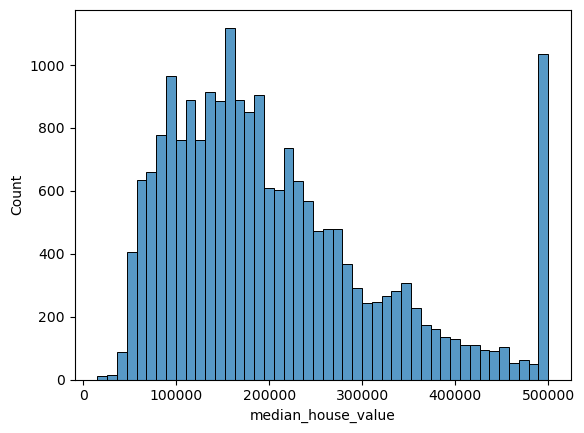

In [8]:
sns.histplot(df['median_house_value'])
plt.show()

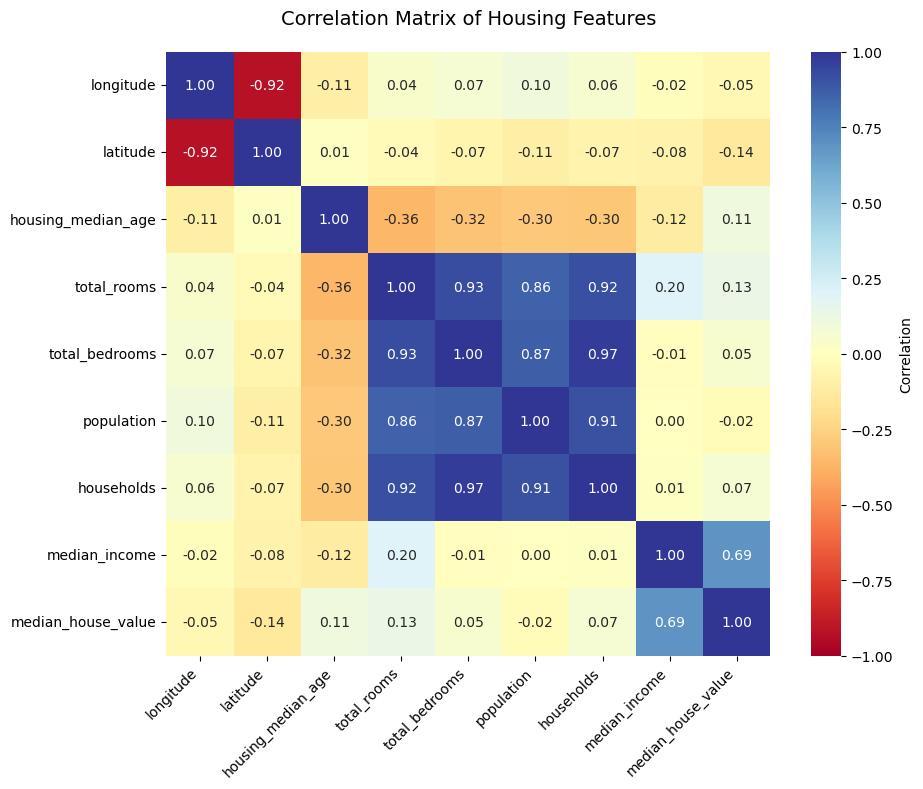

In [22]:

# Step 3: Select numeric columns (exclude ocean_proximity for correlation)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# Step 4: Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Step 5: Create a clear heatmap
plt.figure(figsize=(10, 8))  # Set figure size for readability
sns.heatmap(
    corr_matrix,
    annot=True,  # Show correlation values in cells
    fmt=".2f",  # Format to 2 decimal places
    cmap='RdYlBu',  # Diverging colormap (red-yellow-blue)
    vmin=-1, vmax=1,  # Set correlation range
    center=0,  # Center the colormap at 0
    square=True,  # Make cells square for better visuals
    annot_kws={"size": 10},  # Set font size for annotations
    cbar_kws={"label": "Correlation"}  # Label the colorbar
)

# Step 6: Customize labels and title
plt.title('Correlation Matrix of Housing Features', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)

# Step 7: Adjust layout to prevent label cutoff
plt.tight_layout()

# Step 8: Save the heatmap
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

# Step 9: Display the plot
plt.show()

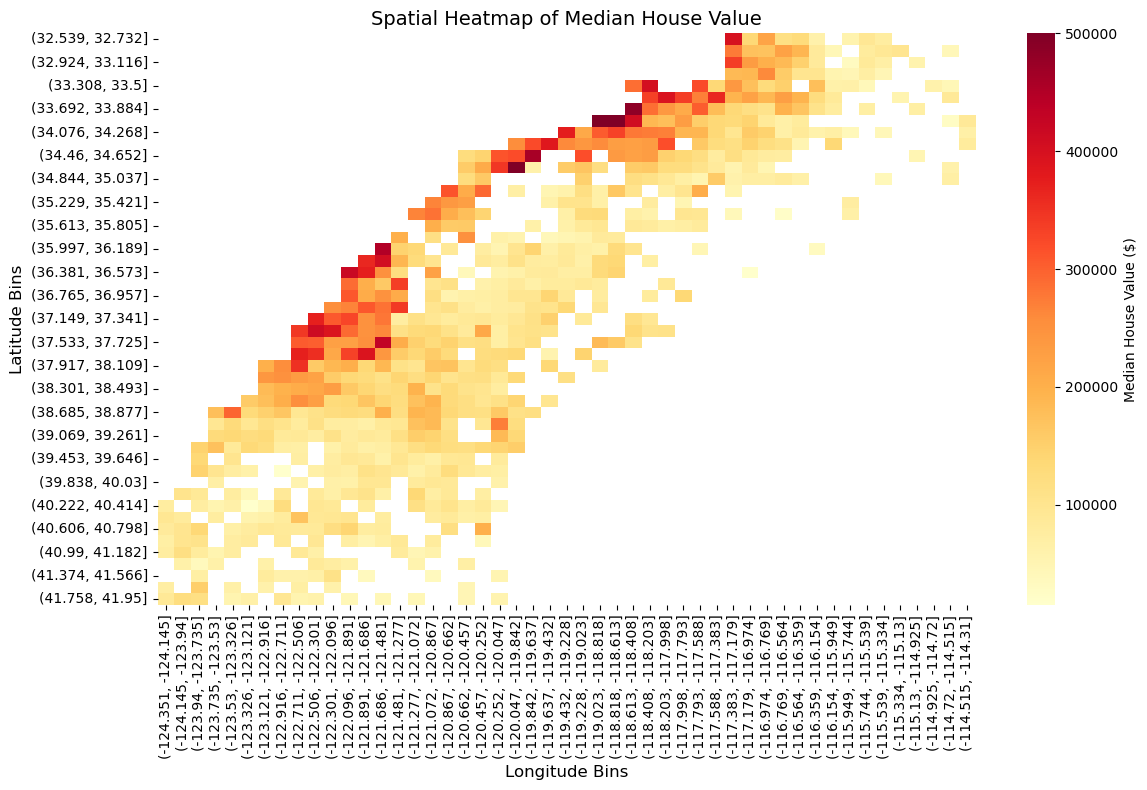

In [36]:
#Spatial Heatmap of Median House Value
lon_bins = np.linspace(df['longitude'].min(), df['longitude'].max(), 50)
lat_bins = np.linspace(df['latitude'].min(), df['latitude'].max(), 50)
df['lon_bin'] = pd.cut(df['longitude'], bins=lon_bins, include_lowest=True)
df['lat_bin'] = pd.cut(df['latitude'], bins=lat_bins, include_lowest=True)


plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlOrRd', cbar_kws={'label': 'Median House Value ($)'})
plt.title('Spatial Heatmap of Median House Value', fontsize=14)
plt.xlabel('Longitude Bins', fontsize=12)
plt.ylabel('Latitude Bins', fontsize=12)
plt.tight_layout()
plt.savefig('spatial_heatmap_house_value.png', dpi=300)
plt.show()

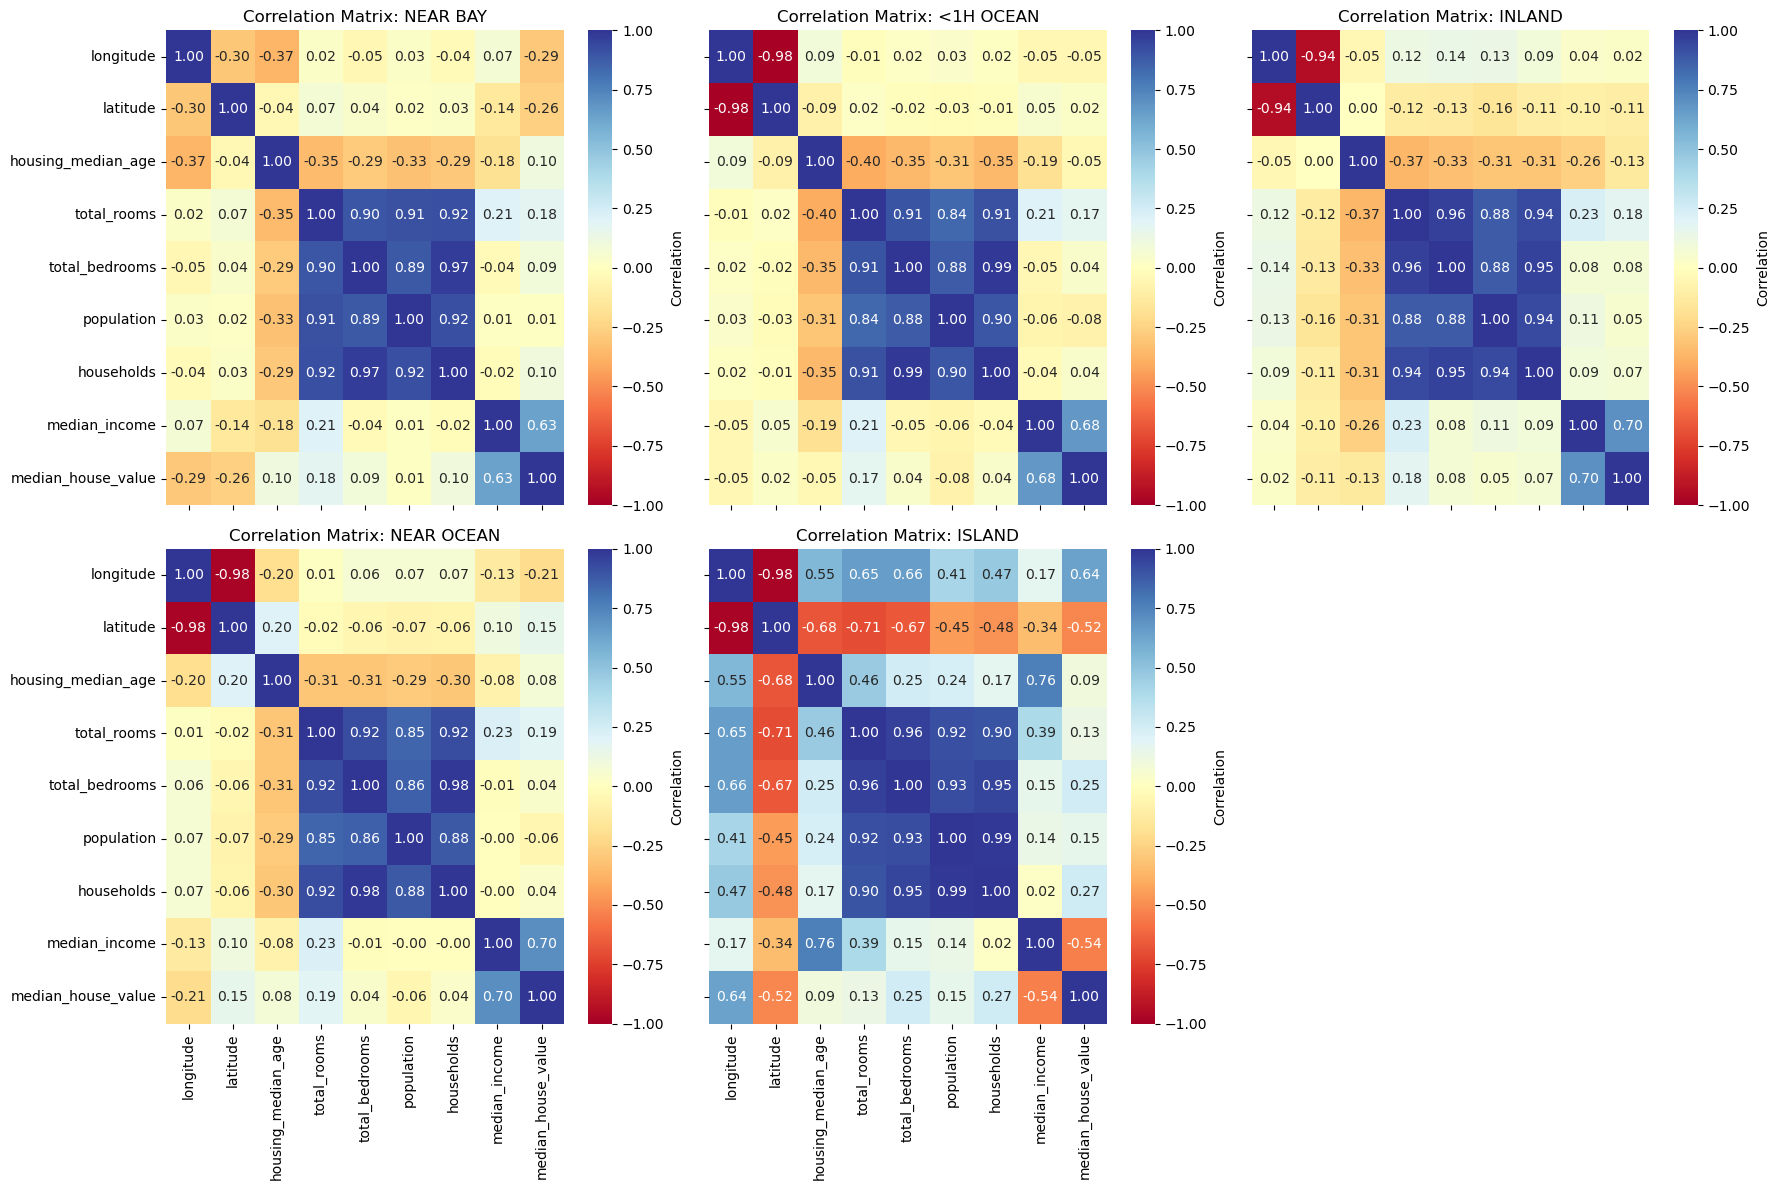

In [50]:
#Heatmap of Feature Correlations by Ocean Proximity

# df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each ocean_proximity category
categories = df['ocean_proximity'].unique()
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for the category
    df_subset = df[df['ocean_proximity'] == category][numeric_cols]
    # Compute correlation matrix
    corr_matrix = df_subset.corr()
    # Plot heatmap
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='RdYlBu',
        vmin=-1,
        vmax=1,
        center=0,
        ax=axes[i],
        cbar_kws={'label': 'Correlation'}
    )
    axes[i].set_title(f'Correlation Matrix: {category}', fontsize=12)

# Remove empty subplots if fewer than 6 categories
for j in range(len(categories), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('correlation_by_ocean_proximity.png', dpi=300)
plt.show()


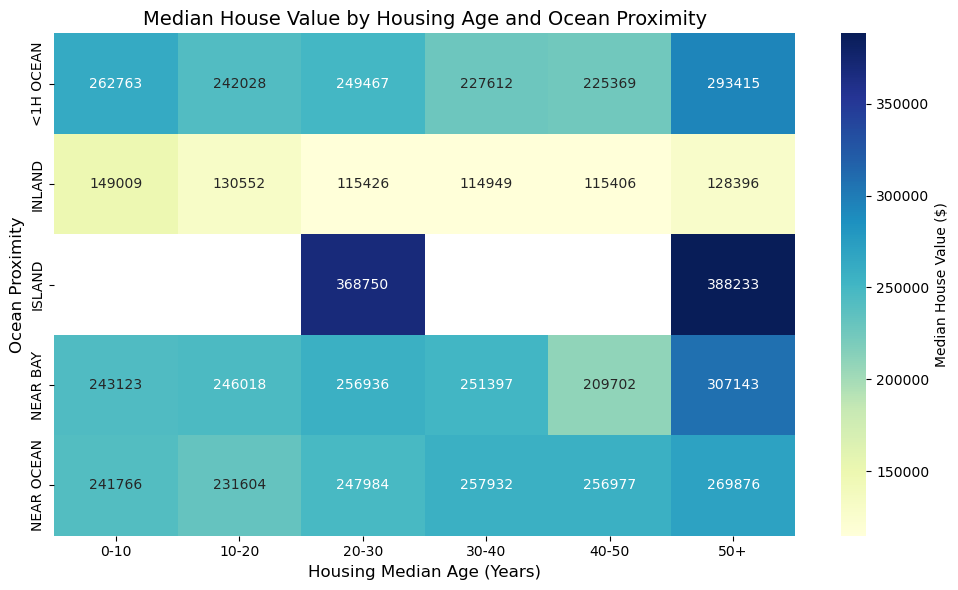

In [56]:
age_bins = pd.cut(df['housing_median_age'], bins=[0, 10, 20, 30, 40, 50, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+'])
df['age_bin'] = age_bins

# Pivot table for mean median_house_value

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap='YlGnBu',
    cbar_kws={'label': 'Median House Value ($)'}
)
plt.title('Median House Value by Housing Age and Ocean Proximity', fontsize=14)
plt.xlabel('Housing Median Age (Years)', fontsize=12)
plt.ylabel('Ocean Proximity', fontsize=12)
plt.tight_layout()
plt.savefig('house_value_age_proximity.png', dpi=300)
plt.show()
